<a href="https://colab.research.google.com/github/OgGaurja/MachineLearningAiProjects/blob/main/number_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
print(f"Tensforflow version {tf.__version__}")

Tensforflow version 2.15.0


##Load dataset

In [ ]:
mnist = tf.keras.datasets.mnist
print(mnist)
(x_train,y_train) , (x_test,y_test)=mnist.load_data()

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>
11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


##Scaling of Pixels

In [ ]:
x_train,x_test = x_train/255 , x_test/255

##See my images

##Cmap. ?? now is black and red

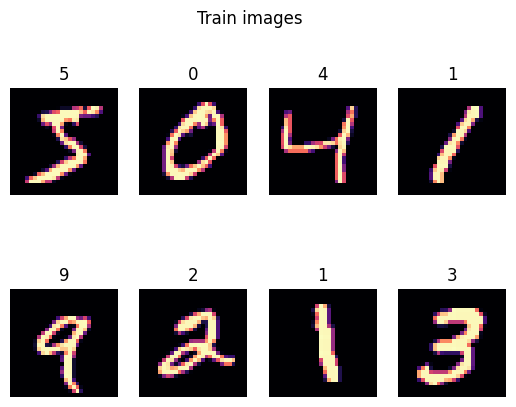

In [ ]:
# fix, ax = plt.subplots()
for ind in range(0,8):
  plt.subplot(2,4, ind+1)
  image = x_train[ind]
  plt.imshow(image, cmap='magma')
  plt.title(y_train[ind])
  plt.axis('off')
  plt.suptitle('Train images')


#Show Test images

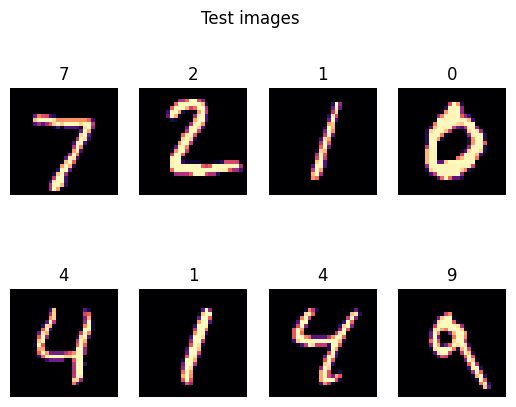

In [ ]:
for ind in range(0,8):
  plt.subplot(2,4,ind+1)
  image = x_test[ind]
  plt.imshow(image,cmap ='magma')
  plt.axis('off')
  plt.suptitle('Test images')
  plt.title(y_test[ind])

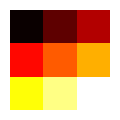

In [ ]:
import numpy as np
def make_image(data, outputname, size=(1, 1), dpi=80):
    fig = plt.figure()
    fig.set_size_inches(size)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.set_cmap('hot')
    ax.imshow(data, aspect='equal')
    plt.savefig(outputname, dpi=dpi)

# data = mpimg.imread(inputname)[:,:,0]
data = np.arange(1,10).reshape((3, 3))

make_image(data, '/tmp/out.png')


#CNN

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

##Compile

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


##Fit the model

##Concept of Callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
model.fit(x_train,y_train,epochs = 50, callbacks=[myCallback()])

Epoch 1/50
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2930 - accuracy: 0.9147
Epoch 2/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1411 - accuracy: 0.9585
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1086 - accuracy: 0.9675
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0873 - accuracy: 0.9731
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0774 - accuracy: 0.9758
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0654 - accuracy: 0.9795
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0577 - accuracy: 0.9814
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0522 - accuracy: 0.9828
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0483 - accuracy: 0.9841
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

#Validate

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9820


[0.07042760401964188, 0.9819999933242798]

##Random image generator

In [ ]:
import random

In [ ]:
imgNum = random.randint(0,10000)
print(f"Image index-- {imgNum} ")

Image index-- 494 


##Image test

(28, 28)
7


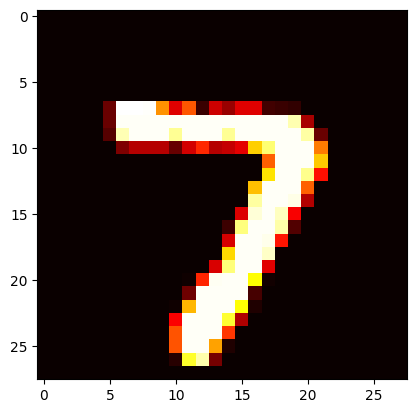

In [ ]:
single_test = x_test[imgNum]
print(single_test.shape)
print(y_test[imgNum])
plt.imshow(single_test)


##Expanding dimensions

In [ ]:
single_test = np.expand_dims(single_test,0)
print(single_test)

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

##Single prediction

In [ ]:
single_pred = model.predict(single_test)
# print(single_pred[0][1])
# print(single_pred)
b = np.argmax(single_pred)
print(f"Confidence --> {single_pred[0][b]}, Prediction --> {b}")

1/1 [==============================] - 0s 96ms/step
Confidence --> 1.0, Prediction --> 7


##Save model

In [ ]:
tf.saved_model.save(model, "./models/mnist")

##Convert

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('models/mnist')
tflite_model = converter.convert()

##Save again into the models folder

In [ ]:
open("models/converted_mnist_model.tflite", "wb").write(tflite_model)

409060

##Predict for a single prediction